In [ ]:
# import library
import pandas as pd
import numpy as np

#import visualization library
import matplotlib.pyplot as plt
import seaborn as sns

#import ML Data Pre-Processing
from sklearn.model_selection import train_test_split as holdout
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, RobustScaler, StandardScaler

#import ML Model
#RandomForestRegressor
#SVC
#LinearRegression, Lasso, Ridge, ElasticNet
#DecisionTreeRegressor
#............

#import model tuning (K-Fold, GridSearchCV)

#import model evaluation
#MSE, MAE, RMSE, R-Squared

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load Dataset

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/Dataset2_House_Price.csv')
data.head(10)

,made,squareMeters,numberOfRooms,hasStorageRoom,hasGuestRoom,price
0,2005,75523,3,0,7,7559081.5
1,2015,80771,39,1,2,8085989.5
2,2021,55712,58,1,9,5574642.1
3,2012,32316,47,0,3,3232561.2
4,1990,70429,19,1,4,7055052.0
5,2012,39223,36,0,1,3926647.2
6,1995,58682,10,0,5,5876376.5
7,2003,86929,100,0,10,8696869.3
8,2012,51522,3,1,5,5154055.2
9,2021,39686,42,1,3,3970892.1


In [ ]:
data.dtypes

made                int64
squareMeters        int64
numberOfRooms       int64
hasStorageRoom      int64
hasGuestRoom        int64
price             float64
dtype: object

In [ ]:
data[["hasStorageRoom"]] = data[["hasStorageRoom"]].astype("category")
data.dtypes

made                 int64
squareMeters         int64
numberOfRooms        int64
hasStorageRoom    category
hasGuestRoom         int64
price              float64
dtype: object

In [ ]:
data.shape

(10000, 6)

In [ ]:
data.info

<bound method DataFrame.info of       made  squareMeters  numberOfRooms hasStorageRoom  hasGuestRoom  \
0     2005         75523              3              0             7   
1     2015         80771             39              1             2   
2     2021         55712             58              1             9   
3     2012         32316             47              0             3   
4     1990         70429             19              1             4   
...    ...           ...            ...            ...           ...   
9995  2009          1726             89              0             4   
9996  1990         44403             29              0             0   
9997  2005         83841              3              1             9   
9998  2010         59036             70              1             4   
9999  1994          1440             84              1             6   

          price  
0     7559081.5  
1     8085989.5  
2     5574642.1  
3     3232561.2  
4     7055052.0  
...         ...  
9995   176425.9  
9996  4448474.0  
9997  8390030.5  
9998  5905107.0  
9999   146708.4  

[10000 rows x 6 columns]>

In [ ]:
data.isna().sum()

made              0
squareMeters      0
numberOfRooms     0
hasStorageRoom    0
hasGuestRoom      0
price             0
dtype: int64

Pemeriksaan apakah ada data null dan hasilnya dataset ini tidak terdapat null value

In [ ]:
drd = data[data.duplicated]
print("number of duplicate rows: ", drd.shape)

number of duplicate rows:  (0, 6)


Pemeriksaan apakah ada data yang duplikat dan hasilnya dataset ini tidak terdapat data yang duplikat

# EDA

In [ ]:
data.describe()

,made,squareMeters,numberOfRooms,hasGuestRoom,price
count,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,2005.48850,49870.13120,50.358400,4.99460,4.993448e+06
std,9.30809,28774.37535,28.816696,3.17641,2.877424e+06
min,1990.00000,89.00000,1.000000,0.00000,1.031350e+04
25%,1997.00000,25098.50000,25.000000,2.00000,2.516402e+06
50%,2005.50000,50105.50000,50.000000,5.00000,5.016180e+06
75%,2014.00000,74609.75000,75.000000,8.00000,7.469092e+06
max,2021.00000,99999.00000,100.000000,10.00000,1.000677e+07


<ipython-input-43-492880d59cb3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data["price"], kde = True, color = 'c')


Text(0.5, 1.0, 'Distribution of Price')

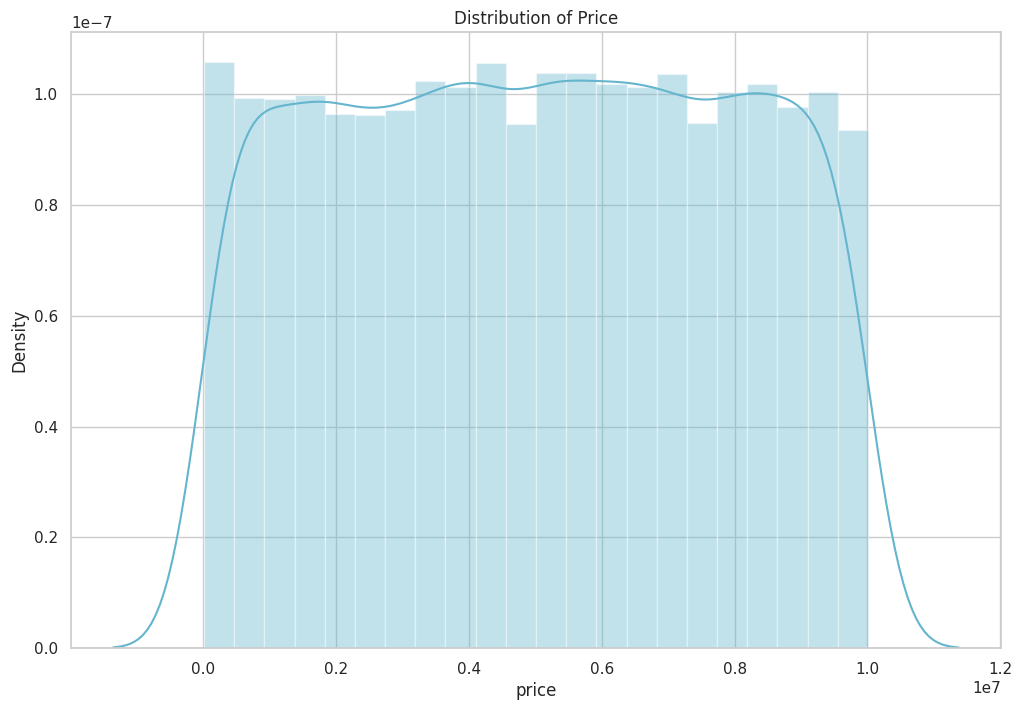

In [ ]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(data["price"], kde = True, color = 'c')
plt.title('Distribution of Price')

Dari hasil plot di atas menunjukkan bahwa kolom price sebagai target label memiliki distribusi data yang normal (bell Curve)

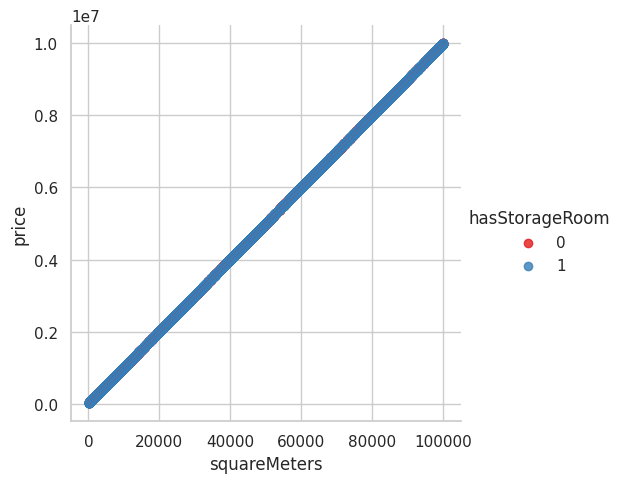

In [ ]:
ax = sns.lmplot(x = 'squareMeters', y = 'price', hue='hasStorageRoom', data=data, palette='Set1')

Dari hasil plot di atas menunjukkan adanya hubungan yang signifikan antara squareMeters dan Price, artinya semakin tinggi squareMeters maka semakin tinggi pricenya

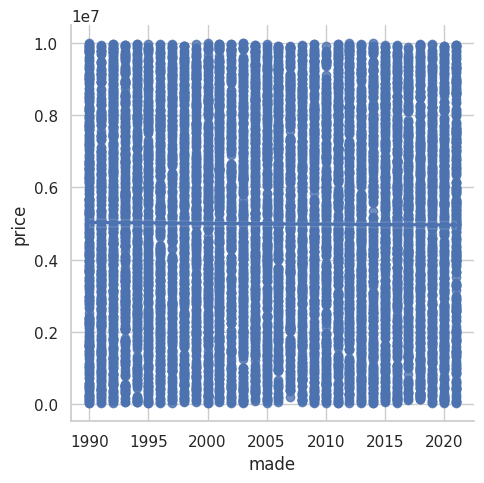

In [ ]:
ax = sns.lmplot(x = 'made', y = 'price', data=data, palette='Set1')

Dari hasil plot di atas menunjukkan bahwa kolom made dan kolom price tidak memiliki hubungan yang signifikan

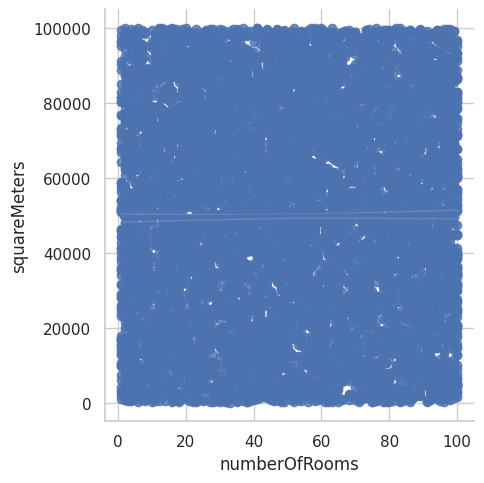

In [ ]:
ax = sns.lmplot(x = 'numberOfRooms', y = 'squareMeters', data=data, palette='Set1')

Dari hasil plot di atas menunjukkan bahwa kolom squareMeters dan kolom numberOfRooms tidak memiliki hubungan yang signifikan

<ipython-input-47-1d763766392e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=price, y=price .index, palette= 'Blues')


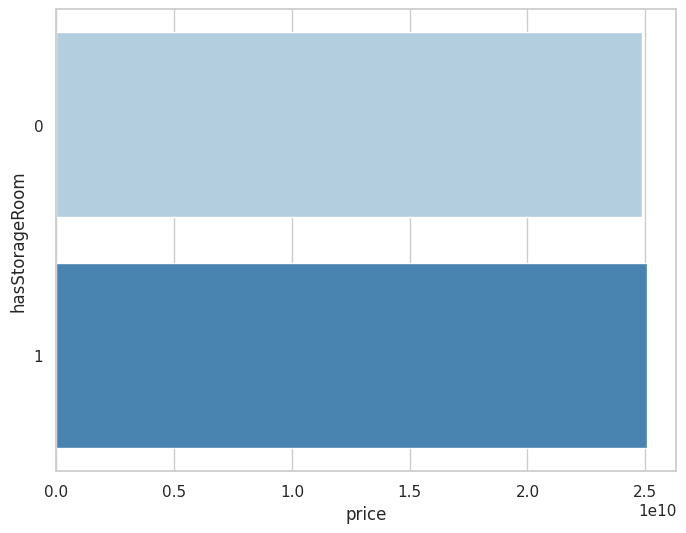

In [ ]:
price = data['price'].groupby(data.hasStorageRoom).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(x=price, y=price .index, palette= 'Blues')

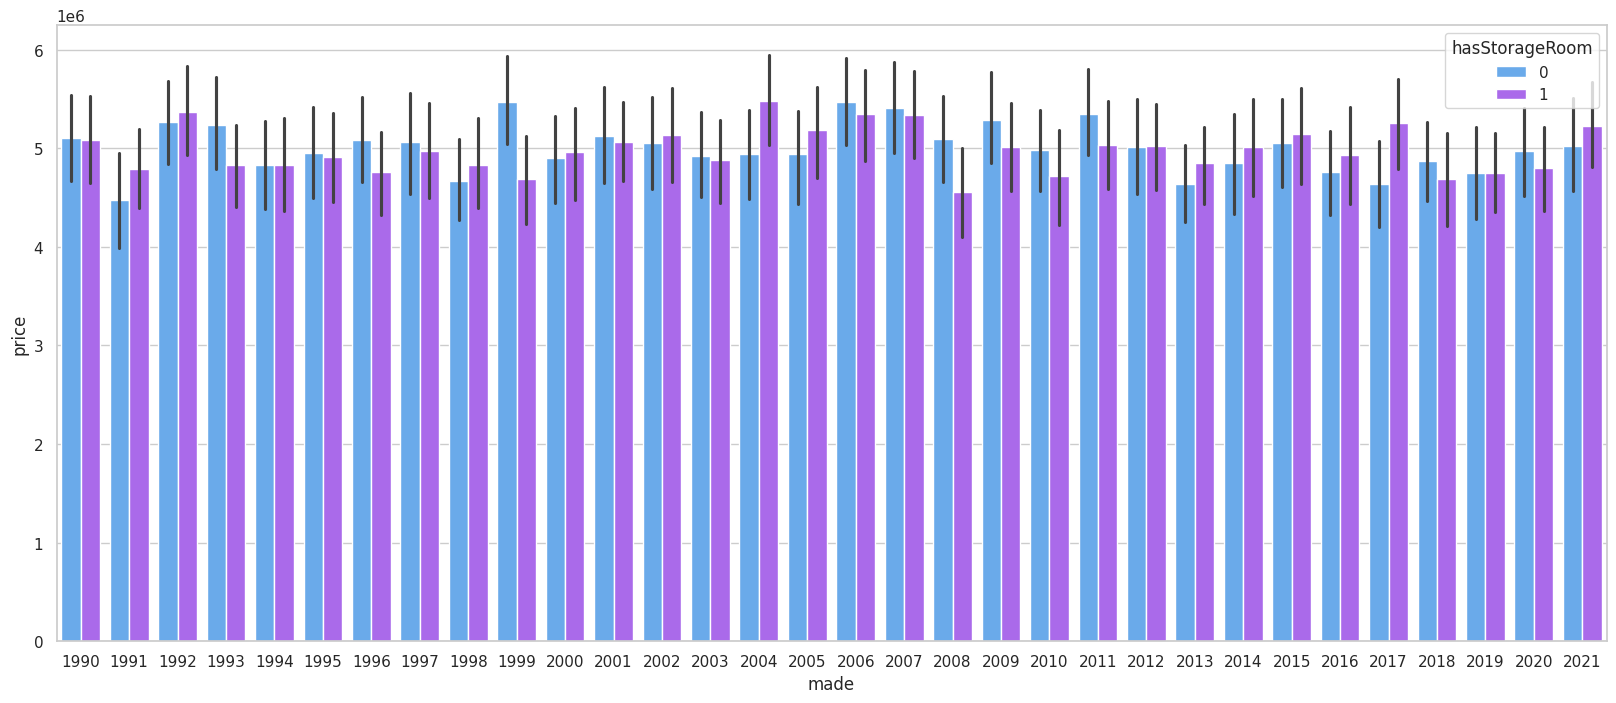

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(20, 8))
ax = sns.barplot(x='made', y='price', hue='hasStorageRoom', data=data, palette='cool')

<ipython-input-49-8322609b6226>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['price'], palette='coolwarm')


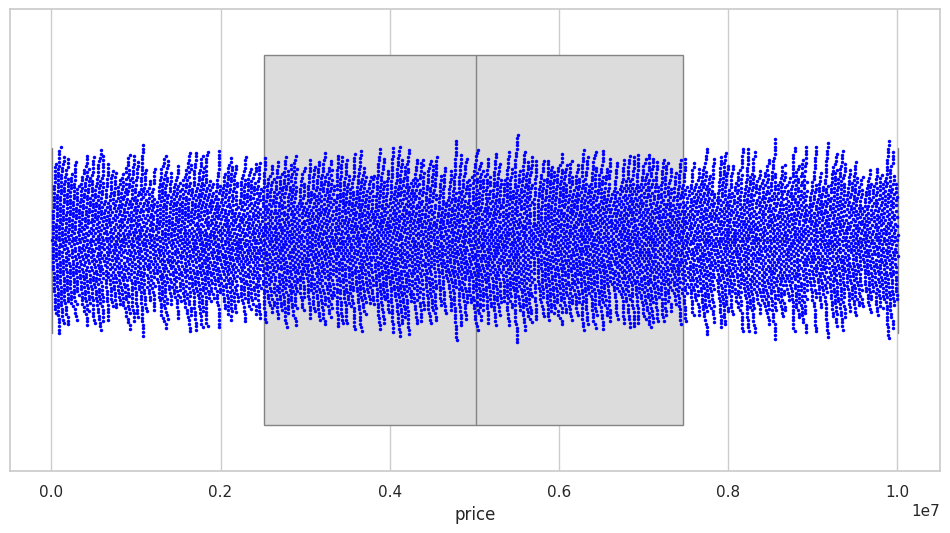

In [ ]:
plt.figure(figsize=(12,6))

sns.boxplot(x=data['price'], palette='coolwarm')
sns.swarmplot(x=data['price'], color='blue', alpha=1, size=2.5)

plt.show()

Dari hasil boxplot menunjukkan bahwa tidak ditemukan adanya data yang outlier

<ipython-input-50-1de714181632>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(data.corr(), annot=True, cmap="cool")


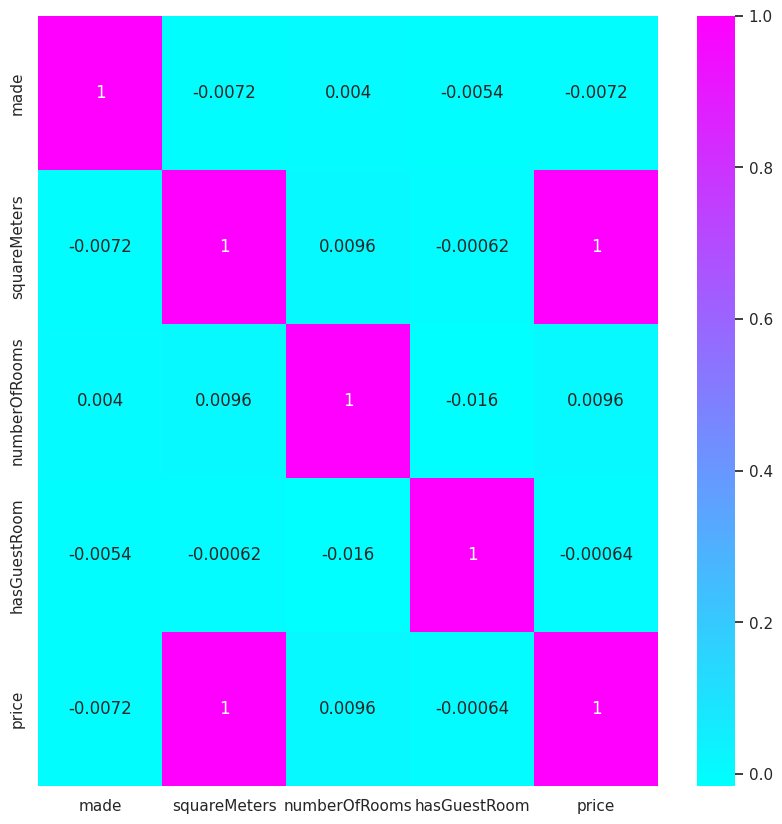

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(data.corr(), annot=True, cmap="cool")

<ipython-input-51-c94d29714f7f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_data = data.corr()


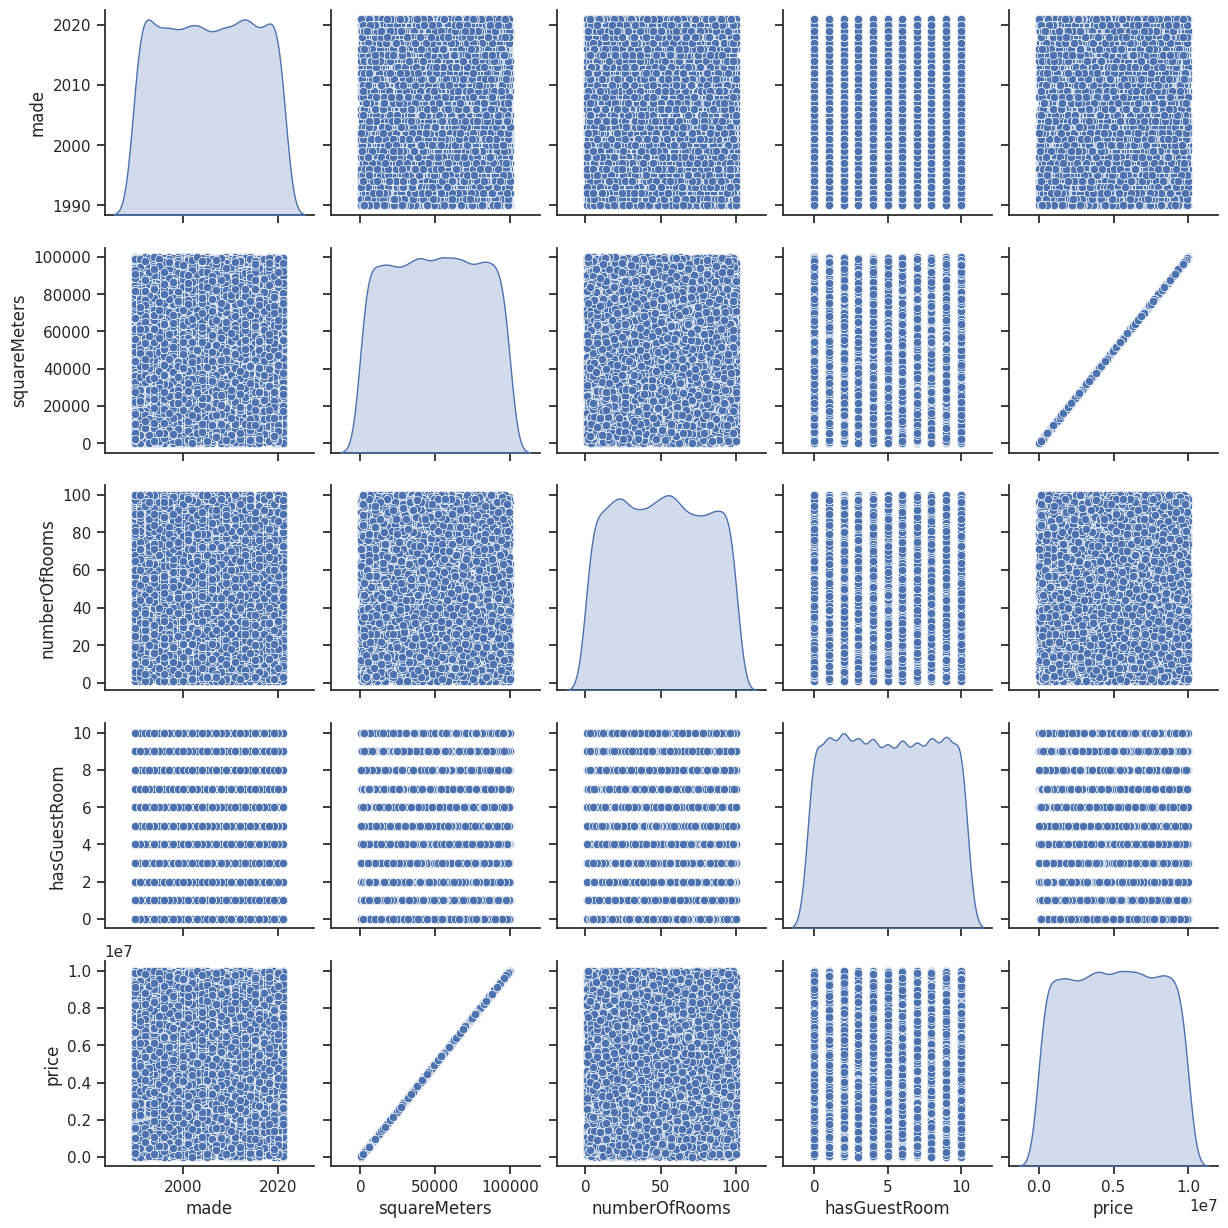

In [ ]:
correlation_data = data.corr()

sns.set(style="ticks")
sns.pairplot(data, diag_kind="kde")
plt.show()

Dari hasil heatmap dan pairplot di atas menunjukkan kolom memiliki hubungan signifikan adalah kolom squareMeters dan kolom price

# Data Pre-processing

In [ ]:
#Karena data berupa int dan float maka tidak diperlukan encoding.

#Lakukan scaling (Jika perlu) --> Boleh eksperimen menggunakan berbagai macam scaling
dfc = data.copy()
#Standard Scaler menggunakan data_stdr

data_minmax = data.copy()
#Minmax Scaler menggunakan data_minmax

data_robust = data.copy()
#Robust Scaler menggunakan data_robust

#Test train split dengan beberapa metode (Random, K-Fold split) --> Random bisa test data percentage diubah2
#0.2, 0.25, 0.3, 0.33

#data_stdr atau data_minmax atau data_robust
x= data.drop(columns=['price'], axis=1)
y= data['price']


Melakukan standard scaling

In [ ]:
# Membuat objek StandardScaler
scaler = StandardScaler()

# Menggunakan fit_transform untuk melakukan standard scaling pada DataFrame
scaled_data = scaler.fit_transform(dfc)

# Mengonversi hasil scaling kembali ke DataFrame
stdr_data = pd.DataFrame(scaled_data, columns=dfc.columns)

print("DataFrame Asli:")
print(data)
print("\nDataFrame Setelah Standard Scaling:")
print(stdr_data)

DataFrame Asli:
      made  squareMeters  numberOfRooms hasStorageRoom  hasGuestRoom  \
0     2005         75523              3              0             7   
1     2015         80771             39              1             2   
2     2021         55712             58              1             9   
3     2012         32316             47              0             3   
4     1990         70429             19              1             4   
...    ...           ...            ...            ...           ...   
9995  2009          1726             89              0             4   
9996  1990         44403             29              0             0   
9997  2005         83841              3              1             9   
9998  2010         59036             70              1             4   
9999  1994          1440             84              1             6   

          price  
0     7559081.5  
1     8085989.5  
2     5574642.1  
3     3232561.2  
4     7055052.0  
...        

Melakukan MinMax scaling

In [ ]:
# Membuat objek StandardScaler
scaler = MinMaxScaler()

# Menggunakan fit_transform untuk melakukan standard scaling pada DataFrame
scaled_data = scaler.fit_transform(data_minmax)

# Mengonversi hasil scaling kembali ke DataFrame
minmax_data = pd.DataFrame(scaled_data, columns=dfc.columns)

print("DataFrame Asli:")
print(data)
print("\nDataFrame Setelah Minmax Scaling:")
print(minmax_data)

DataFrame Asli:
      made  squareMeters  numberOfRooms hasStorageRoom  hasGuestRoom  \
0     2005         75523              3              0             7   
1     2015         80771             39              1             2   
2     2021         55712             58              1             9   
3     2012         32316             47              0             3   
4     1990         70429             19              1             4   
...    ...           ...            ...            ...           ...   
9995  2009          1726             89              0             4   
9996  1990         44403             29              0             0   
9997  2005         83841              3              1             9   
9998  2010         59036             70              1             4   
9999  1994          1440             84              1             6   

          price  
0     7559081.5  
1     8085989.5  
2     5574642.1  
3     3232561.2  
4     7055052.0  
...        

Melakukan Robust scaling

In [ ]:
# Membuat objek StandardScaler
scaler = RobustScaler()

# Menggunakan fit_transform untuk melakukan standard scaling pada DataFrame
scaled_data = scaler.fit_transform(data_robust)

# Mengonversi hasil scaling kembali ke DataFrame
robust_data = pd.DataFrame(scaled_data, columns=dfc.columns)

print("DataFrame Asli:")
print(data)
print("\nDataFrame Setelah Robust Scaling:")
print(robust_data)

DataFrame Asli:
      made  squareMeters  numberOfRooms hasStorageRoom  hasGuestRoom  \
0     2005         75523              3              0             7   
1     2015         80771             39              1             2   
2     2021         55712             58              1             9   
3     2012         32316             47              0             3   
4     1990         70429             19              1             4   
...    ...           ...            ...            ...           ...   
9995  2009          1726             89              0             4   
9996  1990         44403             29              0             0   
9997  2005         83841              3              1             9   
9998  2010         59036             70              1             4   
9999  1994          1440             84              1             6   

          price  
0     7559081.5  
1     8085989.5  
2     5574642.1  
3     3232561.2  
4     7055052.0  
...        

Melakukan modeling test dengan data standard scaling

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

x = stdr_data.drop(['price'], axis=1) #Prediktor
y = stdr_data['price'] #Label
x_train, x_test, y_train, y_test = holdout(x,y, test_size=0.2, random_state=0)

In [ ]:
Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)
y_train_pred = Lin_reg.predict(x_train)
y_test_pred = Lin_reg.predict(x_test)
print(Lin_reg.intercept_)
print(Lin_reg.coef_)
print("Score: ", Lin_reg.score(x_test, y_test))
print("Score: ", Lin_reg.score(x_train, y_train))
# Cek overfit better nanti pakai R2 dan MAE (bandingkan antara train dan test)

2.81454800852253e-06
[ 6.02378626e-06  1.00000555e+00  1.22988139e-05 -1.51712911e-06
 -2.68967555e-05]
Score:  0.9999986716413705
Score:  0.9999987247687055


Ada kemungkinan Overfit

In [ ]:
from sklearn.linear_model import Lasso
Lasso = Lasso(alpha=0.2,
              fit_intercept=True, precompute = False)
Lasso.fit(x_train, y_train)
print(Lasso.intercept_)
print(Lasso.coef_)
print("Score: ", Lasso.score(x_test, y_test))
print("Score: ", Lasso.score(x_train, y_train))

-0.0013718724638861922
[-0.          0.80139787  0.         -0.          0.        ]
Score:  0.9605154291774927
Score:  0.9605542717955144


Skor menunjukkan hasil yang lebih ideal diantara ketiganya

In [ ]:
from sklearn.linear_model import Ridge
Ridge = Ridge(alpha=0.2)
Ridge.fit(x_train, y_train)
print(Ridge.intercept_)
print(Ridge.coef_)
print("Score: ", Ridge.score(x_test, y_test))
print("Score: ", Ridge.score(x_train, y_train))

2.642742837749394e-06
[ 5.77289089e-06  9.99980716e-01  1.24109099e-05 -1.62366374e-06
 -2.66989987e-05]
Score:  0.9999986726737743
Score:  0.9999987241522854


Ada kemungkinan overfit

Melakukan modeling test dengan data MinMax scaling

In [ ]:
x = minmax_data.drop(['price'], axis = 1) #Prediktor
y = minmax_data['price'] #Label
x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.2, random_state=0)

In [ ]:
#Linear
Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)
y_train_pred = Lin_reg.predict(x_train)
y_test_pred = Lin_reg.predict(x_test)
print(Lin_reg.intercept_)
print(Lin_reg.coef_)
print("Score: ", Lin_reg.score(x_test, y_test))
print("Score: ", Lin_reg.score(x_train, y_train))

0.0005063038614357973
[ 5.77468685e-06  9.99454917e-01  1.21621955e-05 -8.73366209e-07
 -2.43736797e-05]
Score:  0.9999986716413705
Score:  0.9999987247687055


Ada kemungkinan overfit

In [ ]:
#Lasso
from sklearn.linear_model import Lasso
Lasso = Lasso(alpha=0.2,
              fit_intercept=True, precompute = False)
Lasso.fit(x_train, y_train)
print(Lasso.intercept_)
print(Lasso.coef_)
print("Score: ", Lasso.score(x_test, y_test))
print("Score: ", Lasso.score(x_train, y_train))

0.4964983586385806
[-0.  0.  0. -0.  0.]
Score:  -0.0012327828792544349
Score:  0.0


Dalam konteks min-max scaling, karena semua fitur ada dalam rentang yang sama (0 hingga 1), beberapa fitur yang memiliki nilai yang kecil dapat terpampat menjadi lebih dekat ke nol. Ini membuat Lasso Regression lebih agresif dalam mengeliminasi fitur

In [ ]:
#Ridge
from sklearn.linear_model import Ridge
Ridge = Ridge(alpha=0.2)
Ridge.fit(x_train, y_train)
print(Ridge.intercept_)
print(Ridge.coef_)
print("Score: ", Ridge.score(x_test, y_test))
print("Score: ", Ridge.score(x_train, y_train))

0.0006548336186443238
[ 2.87632078e-06  9.99155776e-01  1.34980656e-05 -1.61273003e-06
 -2.22153159e-05]
Score:  0.9999986017809178
Score:  0.9999986352039021


Ada kemungkinan overfit

Melakukan modeling test dengan data Robust scaling

In [ ]:
x = robust_data.drop(['price'], axis = 1) #Prediktor
y = robust_data['price'] #Label
x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.2, random_state=0)

In [ ]:
#Linear
Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)
y_train_pred = Lin_reg.predict(x_train)
y_test_pred = Lin_reg.predict(x_test)
print(Lin_reg.intercept_)
print(Lin_reg.coef_)
print("Score: ", Lin_reg.score(x_test, y_test))
print("Score: ", Lin_reg.score(x_train, y_train))

0.00016300944802205043
[ 6.39176220e-06  9.99684790e-01  1.23980029e-05 -1.76279305e-06
 -2.95173452e-05]
Score:  0.9999986716413705
Score:  0.9999987247687055


In [ ]:
#Lasso
from sklearn.linear_model import Lasso
Lasso = Lasso(alpha=0.2,
              fit_intercept=True, precompute = False)
Lasso.fit(x_train, y_train)
print(Lasso.intercept_)
print(Lasso.coef_)
print("Score: ", Lasso.score(x_test, y_test))
print("Score: ", Lasso.score(x_train, y_train))

-0.0049973074462054
[-0.          0.41160654  0.         -0.          0.        ]
Score:  0.6535334337513204
Score:  0.6539451126979212


In [ ]:
#Ridge
from sklearn.linear_model import Ridge
Ridge = Ridge(alpha=0.2)
Ridge.fit(x_train, y_train)
print(Ridge.intercept_)
print(Ridge.coef_)
print("Score: ", Ridge.score(x_test, y_test))
print("Score: ", Ridge.score(x_train, y_train))

0.0001621800603029428
[ 5.60350441e-06  9.99611294e-01  1.27325546e-05 -2.12923604e-06
 -2.88743606e-05]
Score:  0.9999986711119357
Score:  0.9999987193647302


# Feature Selection

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

x = data.drop(["price"], axis=1)
y = data[["price"]]

model = LinearRegression()

#Menggunakan RFE untuk memilih fitur
rfe = RFE(model, n_features_to_select=1)
fit = rfe.fit(x,y)

#menampilkan hasil seleksi fitur
print("Selected Features: ", fit.support_)
print("Feature Ranking: ", fit.ranking_)

Selected Features:  [False  True False False False]
Feature Ranking:  [5 1 4 3 2]


Hasil perangkingan untuk feature yang memiliki hubungan dengan price yang tertinggi pada index ke 2 yaitu kolom squareMeters

# Modelling

In [ ]:
x = data.drop(["price"], axis=1)
y = data[["price"]]

# Split first then scale
x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.2, random_state=0)

scaler_x = StandardScaler()
x_train_scaled = scaler_x.fit_transform(x_train)
x_test_scaled = scaler_x.transform(x_test)

## Training and Testing Model

**Linear Regression Model**

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)
y_train_pred = Lin_reg.predict(x_train)
y_test_pred = Lin_reg.predict(x_test)
y_train_pred = y_train_pred.flatten()
y_test_pred = y_test_pred.flatten()

print("Train Score: ", Lin_reg.score(x_train, y_train))
print("MSE Train: ", metrics.mean_squared_error(y_train, y_train_pred))
print("MAE Train: ", metrics.mean_absolute_error(y_train, y_train_pred))
print("R2 Train: ", metrics.r2_score(y_train, y_train_pred))
print()

print("TestScore: ", Lin_reg.score(x_test, y_test))
print("MSE Test: ", metrics.mean_squared_error(y_test, y_test_pred))
print("MAE Test: ", metrics.mean_absolute_error(y_test, y_test_pred))
print("R2 Test: ", metrics.r2_score(y_test, y_test_pred))

Train Score:  0.9999987247687055
MSE Train:  10631460.081960289
MAE Train:  2636.2105868967906
R2 Train:  0.9999987247687055

TestScore:  0.9999986716413705
MSE Test:  10677651.494926265
MAE Test:  2676.750352996019
R2 Test:  0.9999986716413705


In [ ]:
y_train

,price
7389,2132694.0
9275,2145401.6
2995,9293826.3
5316,5724484.4
356,2530193.9
...,...
9225,4479097.8
4859,9823508.1
3264,8919647.6
9845,9504611.5


In [ ]:
y_train_pred

array([2129257.26324274, 2142903.11857913, 9294010.6464623 , ...,
       8923712.14699266, 9507604.72128974, 1771913.02059064])

In [ ]:
pd.DataFrame({'Actual': y_train['price'].values, 'Prediction': y_train_pred}).round(2)

,Actual,Prediction
0,2132694.0,2129257.26
1,2145401.6,2142903.12
2,9293826.3,9294010.65
3,5724484.4,5719561.73
4,2530193.9,2533504.71
...,...,...
7995,4479097.8,4481565.66
7996,9823508.1,9822351.64
7997,8919647.6,8923712.15
7998,9504611.5,9507604.72


In [ ]:
pd.DataFrame({'Actual': y_test['price'].values, 'Prediction': y_test_pred}).round(2)

,Actual,Prediction
0,1402812.2,1404880.09
1,506461.3,508116.66
2,6272659.4,6274930.73
3,8769157.6,8765495.96
4,190783.0,192830.57
...,...,...
1995,8116681.0,8113128.82
1996,2978583.5,2977583.11
1997,6189722.9,6190437.93
1998,8868266.9,8868202.33


**Lasso Model**

In [ ]:
from sklearn.linear_model import Lasso

Lasso = Lasso(alpha=0.2,
              fit_intercept=True, precompute = False)
Lasso.fit(x_train, y_train)
y_train_pred = Lasso.predict(x_train)
y_test_pred = Lasso.predict(x_test)
y_train_pred = y_train_pred.flatten()
y_test_pred = y_test_pred.flatten()


print("Train Score: ", Lasso.score(x_train, y_train))
print("MSE Train: ", metrics.mean_squared_error(y_train, y_train_pred))
print("MAE Train: ", metrics.mean_absolute_error(y_train, y_train_pred))
print("R2 Train: ", metrics.r2_score(y_train, y_train_pred))
print()

print("Test Score: ", Lasso.score(x_test, y_test))
print("MSE Test: ", metrics.mean_squared_error(y_test, y_test_pred))
print("MAE Test: ", metrics.mean_absolute_error(y_test, y_test_pred))
print("R2 Test: ", metrics.r2_score(y_test, y_test_pred))

Train Score:  0.9999987247686859
MSE Train:  10631460.245825674
MAE Train:  2636.2155528707763
R2 Train:  0.9999987247686859

Test Score:  0.9999986716475148
MSE Test:  10677602.105677038
MAE Test:  2676.737899671121
R2 Test:  0.9999986716475148


**Ridge Model**

In [ ]:
from sklearn.linear_model import Ridge

Ridge = Ridge(alpha=0.2)
Ridge.fit(x_train, y_train)
y_train_pred = Ridge.predict(x_train)
y_test_pred = Ridge.predict(x_test)
y_train_pred = y_train_pred.flatten()
y_test_pred = y_test_pred.flatten()

print("Train Score: ", Ridge.score(x_train, y_train))
print("MSE Train: ", metrics.mean_squared_error(y_train, y_train_pred))
print("MAE Train: ", metrics.mean_absolute_error(y_train, y_train_pred))
print("R2 Train: ", metrics.r2_score(y_train, y_train_pred))
print()

print("Test Score: ", Ridge.score(x_test, y_test))
print("MSE Test: ", metrics.mean_squared_error(y_test, y_test_pred))
print("MAE Test: ", metrics.mean_absolute_error(y_test, y_test_pred))
print("R2 Test: ", metrics.r2_score(y_test, y_test_pred))

Train Score:  0.9999987247687055
MSE Train:  10631460.081960445
MAE Train:  2636.210591713732
R2 Train:  0.9999987247687055

Test Score:  0.9999986716413796
MSE Test:  10677651.42234148
MAE Test:  2676.7503373669674
R2 Test:  0.9999986716413796


**Random Forest Model**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(x_train, y_train)
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)
y_train_pred = y_train_pred.flatten()
y_test_pred = y_test_pred.flatten()

print("Train Score: ", rf.score(x_train, y_train))
print("MSE Train: ", metrics.mean_squared_error(y_train, y_train_pred))
print("MAE Train: ", metrics.mean_absolute_error(y_train, y_train_pred))
print("R2 Train: ", metrics.r2_score(y_train, y_train_pred))
print()

print("Train Score: ", rf.score(x_test, y_test))
print("MSE Test: ", metrics.mean_squared_error(y_test, y_test_pred))
print("MAE Test: ", metrics.mean_absolute_error(y_test, y_test_pred))
print("R2 Test: ", metrics.r2_score(y_test, y_test_pred))

Train Score:  0.9999997435972752
MSE Train:  2137600.7202326427
MAE Train:  1161.5622557500965
R2 Train:  0.9999997435972752

Train Score:  0.999997945282404
MSE Test:  16516291.55199237
MAE Test:  3264.7486609998623
R2 Test:  0.999997945282404


**KNN Regression Model**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train, y_train)
y_train_pred = knn.predict(x_train)
y_test_pred = knn.predict(x_test)
y_train_pred = y_train_pred.flatten()
y_test_pred = y_test_pred.flatten()

print("Train Score: ", knn.score(x_train, y_train))
print("MSE Train: ", metrics.mean_squared_error(y_train, y_train_pred))
print("MAE Train: ", metrics.mean_absolute_error(y_train, y_train_pred))
print("R2 Train: ", metrics.r2_score(y_train, y_train_pred))
print()

print("Train Score: ", knn.score(x_test, y_test))
print("MSE Test: ", metrics.mean_squared_error(y_test, y_test_pred))
print("MAE Test: ", metrics.mean_absolute_error(y_test, y_test_pred))
print("R2 Test: ", metrics.r2_score(y_test, y_test_pred))

Train Score:  0.9999988541179278
MSE Train:  9553090.143154332
MAE Train:  2477.8426975000025
R2 Train:  0.9999988541179278

Train Score:  0.9999980882980252
MSE Test:  15366699.17003641
MAE Test:  3153.3860500000146
R2 Test:  0.9999980882980252


### Berdasarkan hasil di atas, kita akan mengambil model:
**Random Forest**
Karena score tertinggi ditunjukkan pada model Random Forest<br>
Dengan R2 score 0.999997945282404<br>
MAE berapa 3264.7486609998623<br>
MSE berapa 16516291.55199237

# Model Tuning

In [ ]:
# Model Improvement and Tunning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

x = data.drop(['price'], axis = 1)
y = data['price']

x_train, x_test, y_train, y_test = holdout(x,y,test_size=0.2, random_state=0)

rf = RandomForestRegressor(n_estimators=100, random_state=0)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
#Objek gridsearch

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

print("Parameter terbaik:", grid_search.best_params_)
y_pred = grid_search.predict(x_test)

print('MSE: ', mean_squared_error(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))

KeyboardInterrupt: 

Model Terbaik adalah dengan parameter ............

Menyimpan model terpilih ke Pickle

In [ ]:
import pickle
pickle.dump(Ridge, open("Ridge_model.pkl","wb"))

In [ ]:
!pip install pyngrok

In [ ]:
#Menggunakan Flask
from flask import Flask
from flask import jsonify, request
from pyngrok import ngrok
from datetime import datetime


app = Flask(__name__)

#Load model to API
with open("Ridge_model.pkl", "rb") as file:
  model = pickle.load(file)

#Route menggunakan model
@app.route("/predict",methods=["POST"])
def predict():
  #ambil json data dari postman untuk api
  data = request.get_json()

  #ekstrak nilai kolom data dari json data

  #melakukan prediksi

  #menampung data testing atau data baru yang masuk untuk mentraining ulang model
  with open("data_collection.txt","a") as file2:
    file2.write("%s\n" %data)

  return jsonify({"Status" : "Success", "prediction": str(prediction[0])})


if __name__ == "__main__":
  ngrok.set_auth_token("")
  ngrok_tunnel = ngrok.connect(5000)
  print("Public URL:", ngrok_tunnel.public_url)
  app.run()

ERROR:pyngrok.process.ngrok:t=2024-04-02T16:19:19+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2024-04-02T16:19:19+0000 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2024-04-02T16:19:19+0000 lvl=eror msg="terminating with error" obj=app err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your aut

PyngrokNgrokError: The ngrok process errored on start: authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n.

# Kesimpulan

Dari data diatas dapat disimpulkan bahwa:


1.   Model Random Forest memiliki performa yang paling baik dengan nilai Train Score dan Test Score tertinggi.
2.   Meskipun model Linear Regression, Lasso Regression, dan Ridge Regression memiliki performa yang baik dengan skor yang sangat tinggi, mereka memiliki MSE, MAE, dan R2 yang sedikit lebih buruk dibandingkan dengan Random Forest.
3.   





# Saran / Suggestion



1.   Diperlukan peninjauan data lebih lanjut agar menghasilkan model yang lebih baik
2.   

